In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [3]:
circuit = QuantumCircuit(qr, cr)

In [4]:
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
circuit.h(qr[0])

In [6]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [7]:
circuit.cx(qr[0], qr[1])

In [8]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [9]:
circuit.measure(qr, cr)
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [10]:
simulator = Aer.get_backend('qasm_simulator')

In [11]:
result = execute(circuit, backend = simulator).result()

基本的entanglement，只會出現00和11，機率接近50:50

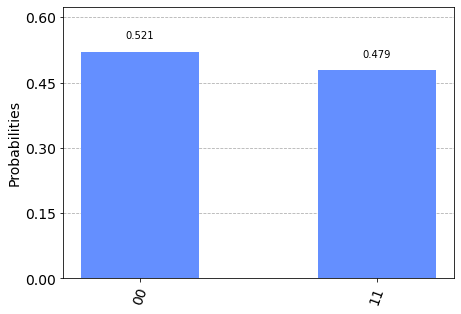

In [12]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [13]:
IBMQ.save_account("09493c7ae571ba589d3d54f19254fa75456350ef95d7f86233e90571db8d37d2e9a7dbb1e1b0de2e6ebcbcb77f5e715e4d5e2389b30d0f7aeda3e84592ca1b31")
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider('ibm-q')

In [15]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [16]:
qcomp = provider.get_backend('ibmq_belem')

In [17]:
job = execute(circuit, backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

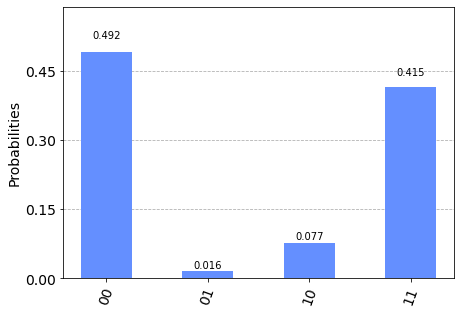

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))